In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# dynamics definition
numPlayers = 4;
T = 4;
A = np.eye(2);
B = np.zeros((2, 1, numPlayers))
B[:,:,0] = np.array([[1], [0]]);
B[:,:,1] = np.array([[1], [-1]])/np.sqrt(2);
B[:,:,2] = np.array([[1], [1]])/np.sqrt(2);
B[:,:,3] = np.array([[0], [-1]]);
G = np.zeros((2*T, T*1, numPlayers)); # 2 is the row dim of B, 1 is the column dim of B
H = np.zeros((T*2, 2));
for p in range(numPlayers):
    for col in range(T):
        Abar = np.eye(2); row=col+1;
        while row < T:
            G[row*2: (row+1)*2, col, p] = np.squeeze(Abar.dot(B[:,:,p]));
            if p == 0:
                H[col*2:(col+1)*2,:] = 1.0*Abar;
            Abar  = Abar.dot(A);
            row += 1;
Q = np.eye(2);
R = np.eye(1);

In [118]:
# derive the step sizes
J = np.zeros((T*numPlayers,T*numPlayers));
diagQ = np.eye(2*T); diagR = np.eye(T);
for i in range(T):
    diagQ[i*2: 2*(i+1), 2*i: 2*(i+1)] = Q;
    diagR[i: (i+1), i: (i+1)] = R;
    
for i in range(numPlayers):
    for j in range(numPlayers):
        J[T*i:T*(i+1), T*j:T*(j+1)]  = G[:,:,i].T.dot(diagQ).dot(G[:,:,j]);
        if i == j:
            J[T*i:T*(i+1), T*i:T*(i+1)] += diagR;
S = 0.5*(J + J.T);  
eigS, eigVecS = np.linalg.eig(S.T.dot(S));
# print (eigS);
alpha = np.min(eigS); 
eigJ, eigVecJ = np.linalg.eig(J.T.dot(J));
beta = np.max(eigJ);
gammai = 2*np.sqrt(alpha)/beta;
# gammai= alpha/beta;

print (gammai)
dim, dim2 = J.shape;
barA = np.eye(dim) - gammai*J; 
w, v = np.linalg.eig(barA);
print (w)            


(0.016238783574565985+0j)
[0.81978466+0.j 0.96287476+0.j 0.97375882+0.j 0.81978466+0.j
 0.96287476+0.j 0.97375882+0.j 0.98376122+0.j 0.98376122+0.j
 0.98376122+0.j 0.98376122+0.j 0.98376122+0.j 0.98376122+0.j
 0.98376122+0.j 0.98376122+0.j 0.98376122+0.j 0.98376122+0.j]


In [95]:
print(J.shape)

(16, 16)


In [115]:
K = 100; # number of times to iterate
# run gradient dynamics
x0 = np.random.rand((2)) + np.array([-0.5, -0.5]);
ut = np.zeros((numPlayers*T,K));
Jt = np.zeros((K, numPlayers));
ut[:,0] = np.random.rand((numPlayers*T));
Hstacked = np.zeros((numPlayers*T, 2));

for p in range(numPlayers):
    Hstacked[p*T:(p+1)*T, :] = G[:, :, p].T.dot(diagQ).dot(H);
    
# xt = np.zeros((2,T,K)); x[:,]

for k in range(1,K):
    ut[:, k] = barA.dot(ut[:,k-1]) + numPlayers*Hstacked.dot(x0);
    xk = H.dot(x0);
    for p in range(numPlayers):
        xk += G[:,:,p].dot(ut[p*T:(p+1)*T,k]);
    for p in range(numPlayers):  
#         print(p+1)
        Jt[k,p] = 0.5*xk.T.dot(diagQ).dot(xk) + 0.5*ut[p*T:(p+1)*T, k].dot(diagR).dot(ut[p*T:(p+1)*T, k]); 
# drawGame(x0, u0)
print(np.linspace(0,K,100).shape)

(100,)


C:\Users\craba\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  from ipykernel import kernelapp as app


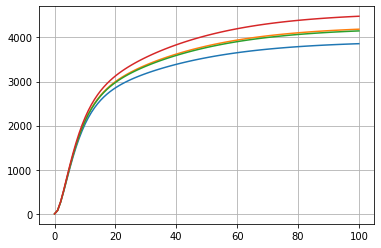

In [117]:
plt.figure()
for p in range(numPlayers):
    plt.plot(np.linspace(0,K,100), Jt[:,p]);
plt.grid()
plt.show()

In [58]:
def drawGame(xt, ut):
    plt.figure();
    
    for p in range(numPlayers):
        plt.arrow(x0[0], x0[1],  B[0,0,p]*ut[p], B[1, 0, p]*ut[p], color = 'g');
    plt.scatter(x0[0], x0[1], color = 'b');
    bounds = 0.5*np.array([[-1,-1,1,1], [-1,1,1,-1]]);
    plt.scatter(bounds[0,:], bounds[1,:], color = 'w');
    plt.grid();
    plt.show();
    

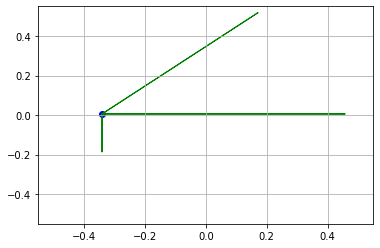